**INTRODUCTION**

This dataset contains an airline passenger satisfaction survey. it contains the factors that are highly correlated to a satisfied and Neutral or dissatisfied passengers



**CONTENT**

**Gender**: Gender of the passengers (Female, Male)

**Customer Type**: The customer type (Loyal customer, disloyal customer)

**Age**: The actual age of the passengers

**Type of Travel**: Purpose of the flight of the passengers (Personal Travel, Business Travel)

**Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

**Flight distance**: The flight distance of this journey

**Inflight wifi service** : Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

**Departure/Arrival time convenient**: Satisfaction level of Departure/Arrival time convenient

**Ease of Online booking**: Satisfaction level of online booking

**Food and drink**: Satisfaction level of Food and drink

**Online boarding**: Satisfaction level of online boarding

**Seat comfort**: Satisfaction level of Seat comfort

**On-board service**: Satisfaction level of On-board service

**Baggage handling**: Satisfaction level of baggage handling

**Check-in service**: Satisfaction level of Check-in service

**Inflight service**: Satisfaction level of inflight service

**Cleanliness**: Satisfaction level of Cleanliness

**Departure Delay in Minutes**: Minutes delayed when departure

**Arrival Delay in Minutes**: Minutes delayed when Arrival

**Satisfaction**: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

#Analysis and preprocessing

Importing all necessary libraries for analysis and preprocessing

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('/content/drive/MyDrive/datascience1/project/ml project/airline_passenger.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,3,3,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,5,5,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,2,4,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,3,4,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,4,2,2,2,4,2,4,0,20.0,satisfied


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df.shape

(25976, 21)

In [9]:
df.size

545496

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

In [11]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,3.215353,3.449222,3.385664,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.331506,1.320090,1.282088,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [12]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [13]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,3,3,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,5,5,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,2,2,4,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,3,4,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,4,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,4,4,3,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,2,2,4,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,4,4,3,5,4,5,4,0,0.0,satisfied


In [14]:
print(df.columns)

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Food and drink', 'Seat comfort', 'On-board service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [15]:
for i in df.columns:
    print(df[i].unique(),i)
    print('_'*30)
    print(df[i].value_counts(),i)
    print('_'*30)

[19556 90035 12360 ... 37675 90086 34799] id
______________________________
id
19556     1
100210    1
50564     1
122974    1
21037     1
         ..
60858     1
44981     1
115289    1
108089    1
34799     1
Name: count, Length: 25976, dtype: int64 id
______________________________
['Female' 'Male'] Gender
______________________________
Gender
Female    13172
Male      12804
Name: count, dtype: int64 Gender
______________________________
['Loyal Customer' 'disloyal Customer'] Customer Type
______________________________
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64 Customer Type
______________________________
[52 36 20 44 49 16 77 43 47 46 33 60 50 31 55 25 30 62 24 22 51 56 41 53
 12 39 32 40 42 28 59 58 27 67 70 66 19 69 35 54 26 61 21 37 45 38  7 34
 17 15 48 13 11 29  8 18 23 65 57 80 64  9 14 68 10 79 63 73 74 71 72 76
 78 75 85] Age
______________________________
Age
39    723
25    713
40    635
41    633
43    626
     ... 
75 

Transforming using label encoding and onehot method

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
labelfit=le.fit(df['Gender'])
df['Gender']=labelfit.transform(df['Gender'])

In [18]:
labelfit=le.fit(df['Customer Type'])
df['Customer Type']=labelfit.transform(df['Customer Type'])

In [19]:
labelfit=le.fit(df['Type of Travel'])
df['Type of Travel']=labelfit.transform(df['Type of Travel'])

In [20]:
labelfit=le.fit(df['satisfaction'])
df['satisfaction']=labelfit.transform(df['satisfaction'])

In [21]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,0,0,52,0,Eco,160,5,4,3,3,3,5,5,2,5,5,50,44.0,1
1,90035,0,0,36,0,Business,2863,1,1,3,5,5,4,4,3,4,5,0,0.0,1
2,12360,1,1,20,0,Eco,192,2,0,2,2,2,4,3,2,2,2,0,0.0,0
3,77959,1,0,44,0,Business,3377,0,0,0,3,4,1,1,3,1,4,0,6.0,1
4,36875,0,0,49,0,Eco,1182,2,3,4,4,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,Business,526,3,3,3,4,4,3,4,4,5,4,0,0.0,0
25972,71167,1,0,23,0,Business,646,4,4,4,4,4,4,5,5,5,4,0,0.0,1
25973,37675,0,0,17,1,Eco,828,2,5,1,2,2,4,4,5,4,2,0,0.0,0
25974,90086,1,0,14,0,Business,1127,3,3,3,4,4,3,5,4,5,4,0,0.0,1


In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
encoder=OneHotEncoder(sparse=False)
one_hot_encoded=encoder.fit_transform(df[['Class']])
print(one_hot_encoded)

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
df1=pd.DataFrame(one_hot_encoded,columns=['Business','Eco','Eco Plus'])
df1.head()

,Business,Eco,Eco Plus
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0


In [25]:
df.drop('Class',inplace=True,axis=1)

In [26]:
df=pd.concat([df,df1],axis=1)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Business,Eco,Eco Plus
0,19556,0,0,52,0,160,5,4,3,3,...,5,2,5,5,50,44.0,1,0.0,1.0,0.0
1,90035,0,0,36,0,2863,1,1,3,5,...,4,3,4,5,0,0.0,1,1.0,0.0,0.0
2,12360,1,1,20,0,192,2,0,2,2,...,3,2,2,2,0,0.0,0,0.0,1.0,0.0
3,77959,1,0,44,0,3377,0,0,0,3,...,1,3,1,4,0,6.0,1,1.0,0.0,0.0
4,36875,0,0,49,0,1182,2,3,4,4,...,2,4,2,4,0,20.0,1,0.0,1.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  int64  
 2   Customer Type                      25976 non-null  int64  
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  int64  
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Food and drink                     25976 non-null  int64  
 10  Seat comfort                       25976 non-null  int64  
 11  On-board service                   25976 non-null  int

In [28]:
df.isnull().sum()

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Food and drink,0


In [29]:
dpl_rows = df.duplicated().any()
dpl_rows

False

In [30]:
df.isna().any()

,0
id,False
Gender,False
Customer Type,False
Age,False
Type of Travel,False
Flight Distance,False
Inflight wifi service,False
Departure/Arrival time convenient,False
Ease of Online booking,False
Food and drink,False


In [31]:
corln = df.corr()['satisfaction']
print(corln)

id                                   0.010965
Gender                               0.007335
Customer Type                       -0.179632
Age                                  0.121697
Type of Travel                      -0.453268
Flight Distance                      0.295292
Inflight wifi service                0.280395
Departure/Arrival time convenient   -0.064798
Ease of Online booking               0.157709
Food and drink                       0.216868
Seat comfort                         0.346275
On-board service                     0.321491
Baggage handling                     0.252415
Checkin service                      0.241495
Inflight service                     0.245573
Cleanliness                          0.314350
Departure Delay in Minutes          -0.051635
Arrival Delay in Minutes            -0.061059
satisfaction                         1.000000
Business                             0.496974
Eco                                 -0.442417
Eco Plus                          

In [32]:
dfd=df.drop(['Departure Delay in Minutes'],axis=1,inplace=True)
dfa=df.drop(['Arrival Delay in Minutes'],axis=1,inplace=True)
dfad=df.drop(['Departure/Arrival time convenient'],axis=1,inplace=True)
df

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Business,Eco,Eco Plus
0,19556,0,0,52,0,160,5,3,3,3,5,5,2,5,5,1,0.0,1.0,0.0
1,90035,0,0,36,0,2863,1,3,5,5,4,4,3,4,5,1,1.0,0.0,0.0
2,12360,1,1,20,0,192,2,2,2,2,4,3,2,2,2,0,0.0,1.0,0.0
3,77959,1,0,44,0,3377,0,0,3,4,1,1,3,1,4,1,1.0,0.0,0.0
4,36875,0,0,49,0,1182,2,4,4,2,2,2,4,2,4,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,1,1,34,0,526,3,3,4,4,3,4,4,5,4,0,1.0,0.0,0.0
25972,71167,1,0,23,0,646,4,4,4,4,4,5,5,5,4,1,1.0,0.0,0.0
25973,37675,0,0,17,1,828,2,1,2,2,4,4,5,4,2,0,0.0,1.0,0.0
25974,90086,1,0,14,0,1127,3,3,4,4,3,5,4,5,4,1,1.0,0.0,0.0


plotting outliers of every column

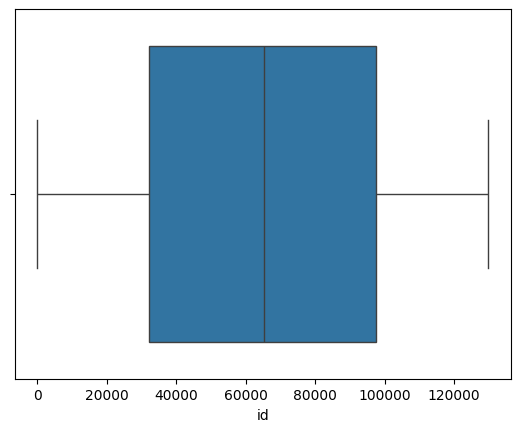

id ******************************


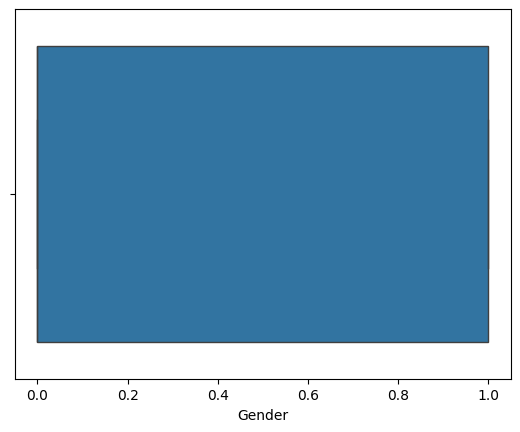

Gender ******************************


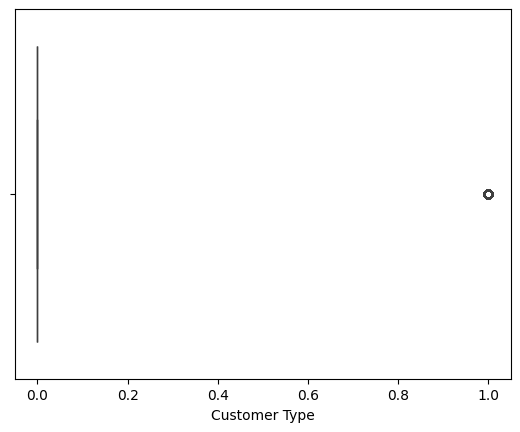

Customer Type ******************************


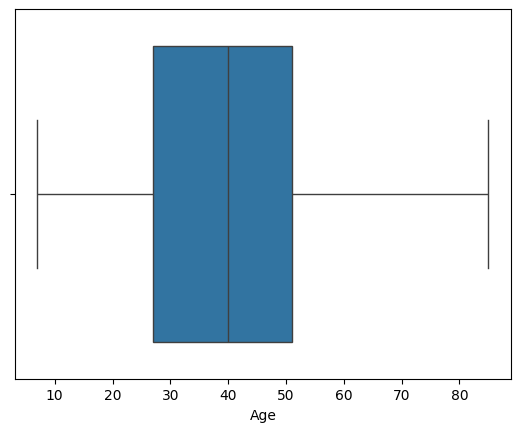

Age ******************************


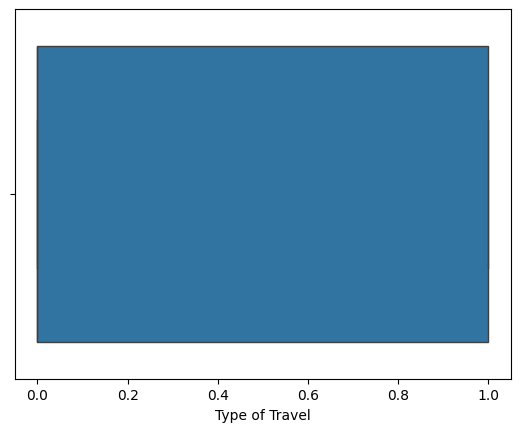

Type of Travel ******************************


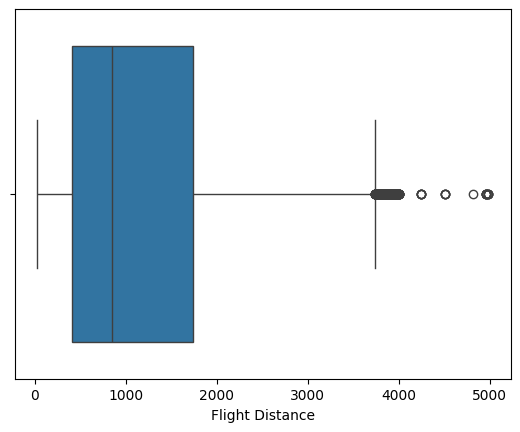

Flight Distance ******************************


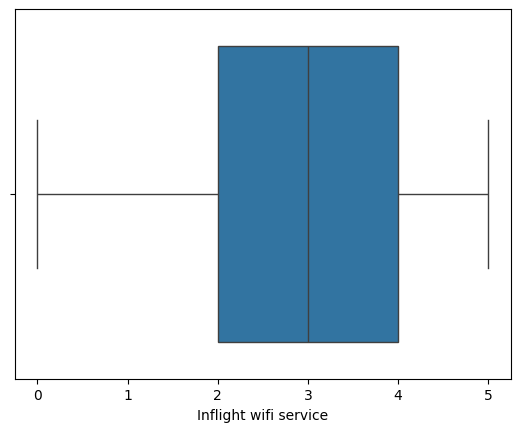

Inflight wifi service ******************************


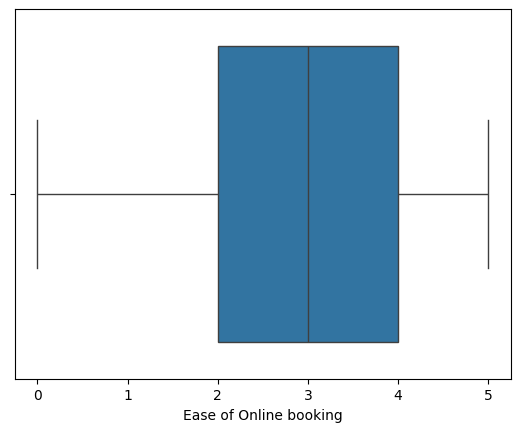

Ease of Online booking ******************************


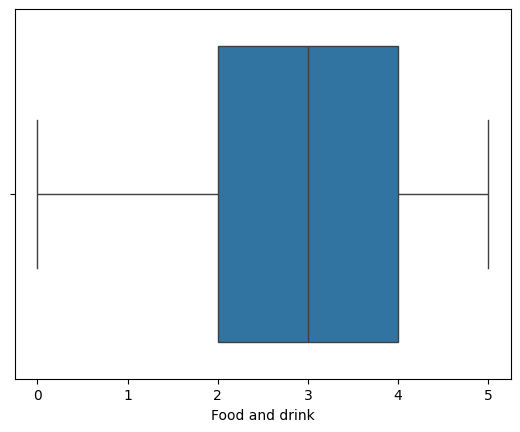

Food and drink ******************************


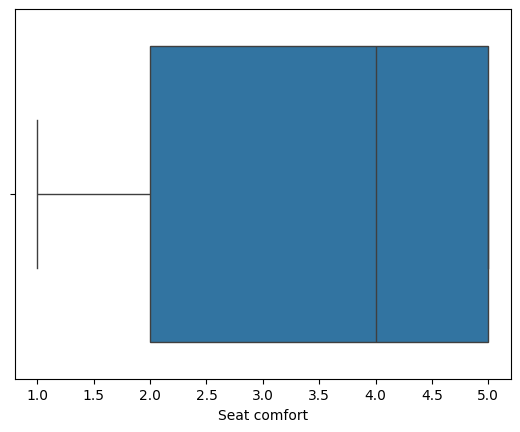

Seat comfort ******************************


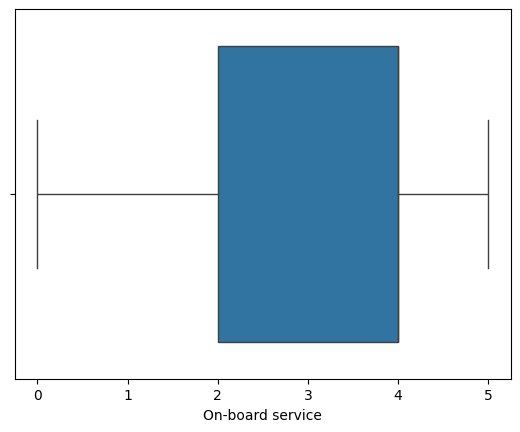

On-board service ******************************


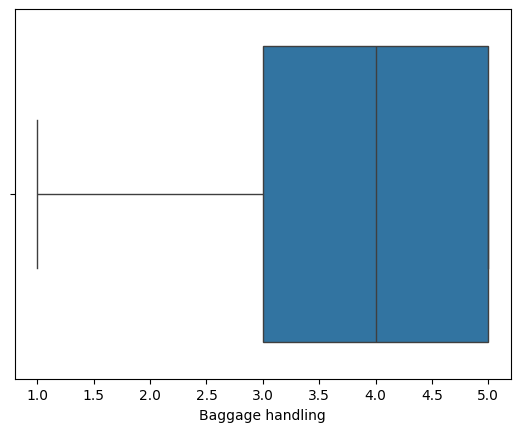

Baggage handling ******************************


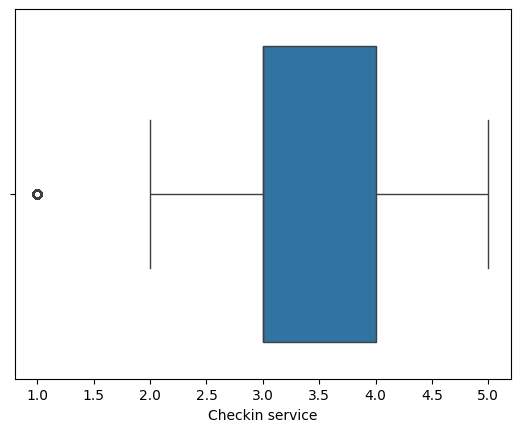

Checkin service ******************************


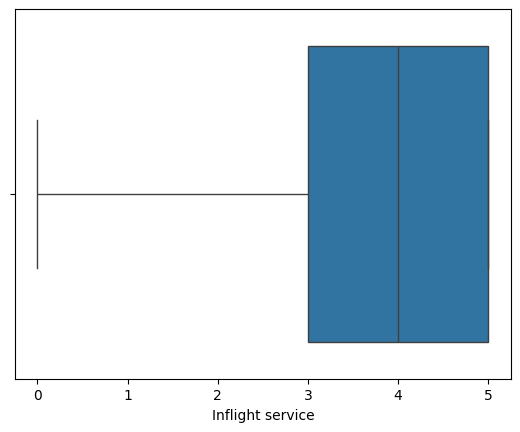

Inflight service ******************************


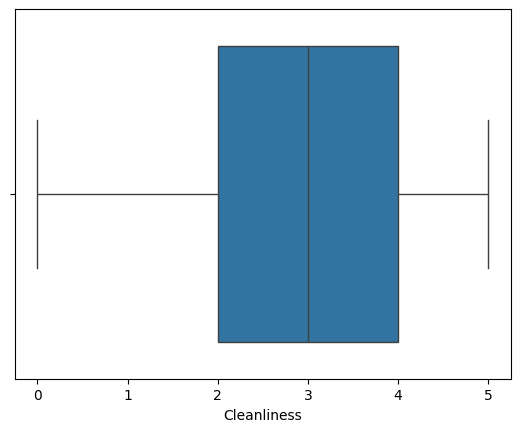

Cleanliness ******************************


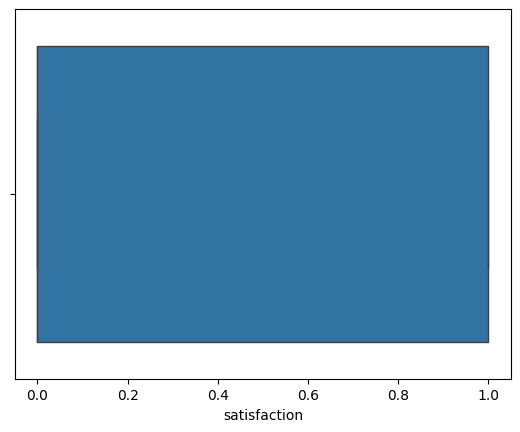

satisfaction ******************************


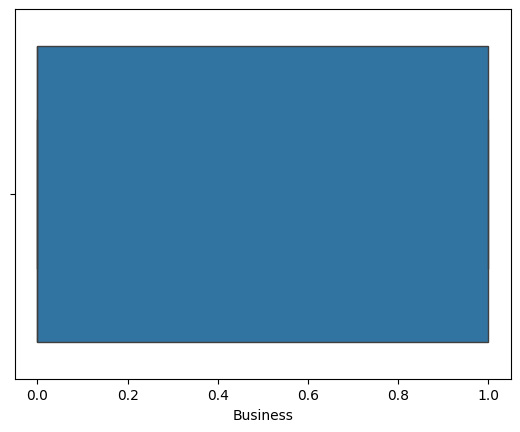

Business ******************************


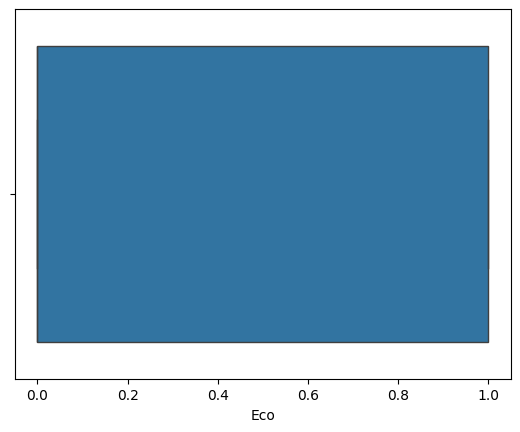

Eco ******************************


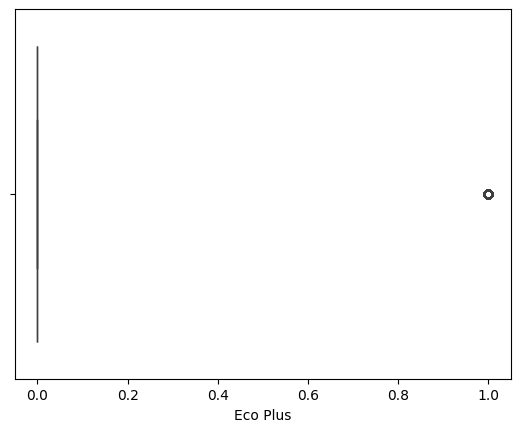

Eco Plus ******************************


In [33]:
for i in df.columns:
  sns.boxplot(x = df[i])
  plt.show()
  print(i,'*'*30)

splitting as input and output,x variable indicates input features and y variable indicates output

In [34]:
x = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [35]:
x.head()

,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Seat comfort,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,Business,Eco,Eco Plus
0,19556,0,0,52,0,160,5,3,3,3,5,5,2,5,5,0.0,1.0,0.0
1,90035,0,0,36,0,2863,1,3,5,5,4,4,3,4,5,1.0,0.0,0.0
2,12360,1,1,20,0,192,2,2,2,2,4,3,2,2,2,0.0,1.0,0.0
3,77959,1,0,44,0,3377,0,0,3,4,1,1,3,1,4,1.0,0.0,0.0
4,36875,0,0,49,0,1182,2,4,4,2,2,2,4,2,4,0.0,1.0,0.0


In [36]:
y.head()

,satisfaction
0,1
1,1
2,0
3,1
4,1


In [37]:
df['satisfaction'].value_counts()

,count
satisfaction,
0,14573
1,11403


Smoting to balance the values of y

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [43]:
xres,yres=sm.fit_resample(xtrain,ytrain)

In [44]:
yres.value_counts()

,count
satisfaction,
0,11692
1,11692


splitting x and y for training and testing purpose

In [41]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=2)

Standardize to  make model perform better

In [45]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

xtrain=sd.fit_transform(xtrain)

xtest=sd.fit_transform(xtest)

xres=sd.fit_transform(xres)

Implementing different supervised algorithms to this dataset

#1)KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [48]:
ypred = knn.predict(xtest)

In [49]:
print(ypred)

[1 1 0 ... 0 0 1]


evaluation

In [50]:
#training score

training_score=knn.score(xtrain,ytrain)
training_score

0.9406159769008662

In [51]:
#testing score

testing_score=knn.score(xtest,ytest)
testing_score

0.9143571978444958

In [52]:
from sklearn import metrics

In [53]:
#accuracy score

metrics.accuracy_score(ytest,ypred)

0.9143571978444958

In [54]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred)

array([[2740,  141],
       [ 304, 2011]])

In [55]:
#precision score

metrics.precision_score(ytest,ypred)

0.9344795539033457

In [56]:
#recall score

metrics.recall_score(ytest,ypred)

0.868682505399568

In [57]:
#classification report

print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2881
           1       0.93      0.87      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.92      0.91      0.91      5196
weighted avg       0.92      0.91      0.91      5196



building knn model with the balanced data

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn1=KNeighborsClassifier()

knn1.fit(xres,yres)

KNeighborsClassifier()

In [59]:
ypred1 = knn1.predict(xtest)

In [60]:
ypred1

array([1, 1, 0, ..., 0, 0, 1])

In [61]:
#training score

training_score=knn1.score(xres,yres)
training_score

0.9494098528908655

In [62]:
#testing score

testing_score=knn1.score(xtest,ytest)
testing_score

0.9110854503464203

In [63]:
#accuracy score

metrics.accuracy_score(ytest,ypred1)

0.9110854503464203

In [64]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred1)

array([[2669,  212],
       [ 250, 2065]])

In [65]:
#precision score

metrics.precision_score(ytest,ypred1)

0.9068950373298199

In [66]:
#recall score

metrics.recall_score(ytest,ypred1)

0.8920086393088553

In [67]:
#classification report

print(metrics.classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2881
           1       0.91      0.89      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.91      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy(accuracy score=0.91)

#2)Decision tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=4,criterion='entropy')

dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

max_depth=4: This parameter limits the maximum depth of the tree to 4 levels. Limiting the depth can help prevent overfitting.

criterion='entropy': This parameter specifies the function to measure the quality of a split. In this case, it uses the entropy (information gain) criterion.

In [69]:
pre=dt.predict(xtest)
pre

array([1, 1, 0, ..., 1, 0, 1])

evaluation

In [70]:
#training score

training_score=dt.score(xtrain,ytrain)
training_score

0.8836381135707411

In [71]:
#testing score

testing_score=dt.score(xtest,ytest)
testing_score

0.8791377983063895

In [72]:
#accuracy score

metrics.accuracy_score(ytest,pre)

0.8791377983063895

In [73]:

#confusion matrix

metrics.confusion_matrix(ytest,pre)

array([[2510,  371],
       [ 257, 2058]])

In [74]:
#precision score

metrics.precision_score(ytest,pre)

0.8472622478386167

In [75]:



#recall score

metrics.recall_score(ytest,pre)

0.8889848812095033

In [76]:
#classification report

print(metrics.classification_report(ytest,pre))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2881
           1       0.85      0.89      0.87      2315

    accuracy                           0.88      5196
   macro avg       0.88      0.88      0.88      5196
weighted avg       0.88      0.88      0.88      5196



plotting decision tree model using this data





[Text(0.5, 0.9, 'x[15] <= 0.042\nentropy = 0.989\nsamples = 20780\nvalue = [11692, 9088]'),
 Text(0.25, 0.7, 'x[6] <= 0.582\nentropy = 0.723\nsamples = 10829\nvalue = [8656, 2173]'),
 Text(0.125, 0.5, 'x[6] <= -1.669\nentropy = 0.28\nsamples = 7930\nvalue = [7546, 384]'),
 Text(0.0625, 0.3, 'x[14] <= -2.106\nentropy = 0.069\nsamples = 244\nvalue = [2, 242]'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 242\nvalue = [0, 242]'),
 Text(0.1875, 0.3, 'x[4] <= 0.417\nentropy = 0.133\nsamples = 7686\nvalue = [7544, 142]'),
 Text(0.15625, 0.1, 'entropy = 0.274\nsamples = 3012\nvalue = [2870, 142]'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 4674\nvalue = [4674, 0]'),
 Text(0.375, 0.5, 'x[6] <= 1.333\nentropy = 0.96\nsamples = 2899\nvalue = [1110, 1789]'),
 Text(0.3125, 0.3, 'x[4] <= 0.417\nentropy = 0.995\nsamples = 2034\nvalue = [1102, 932]'),
 Text(0.28125, 0.1, 'entropy = 0.947\nsamples = 1077\nvalue = [393, 684]'),
 T

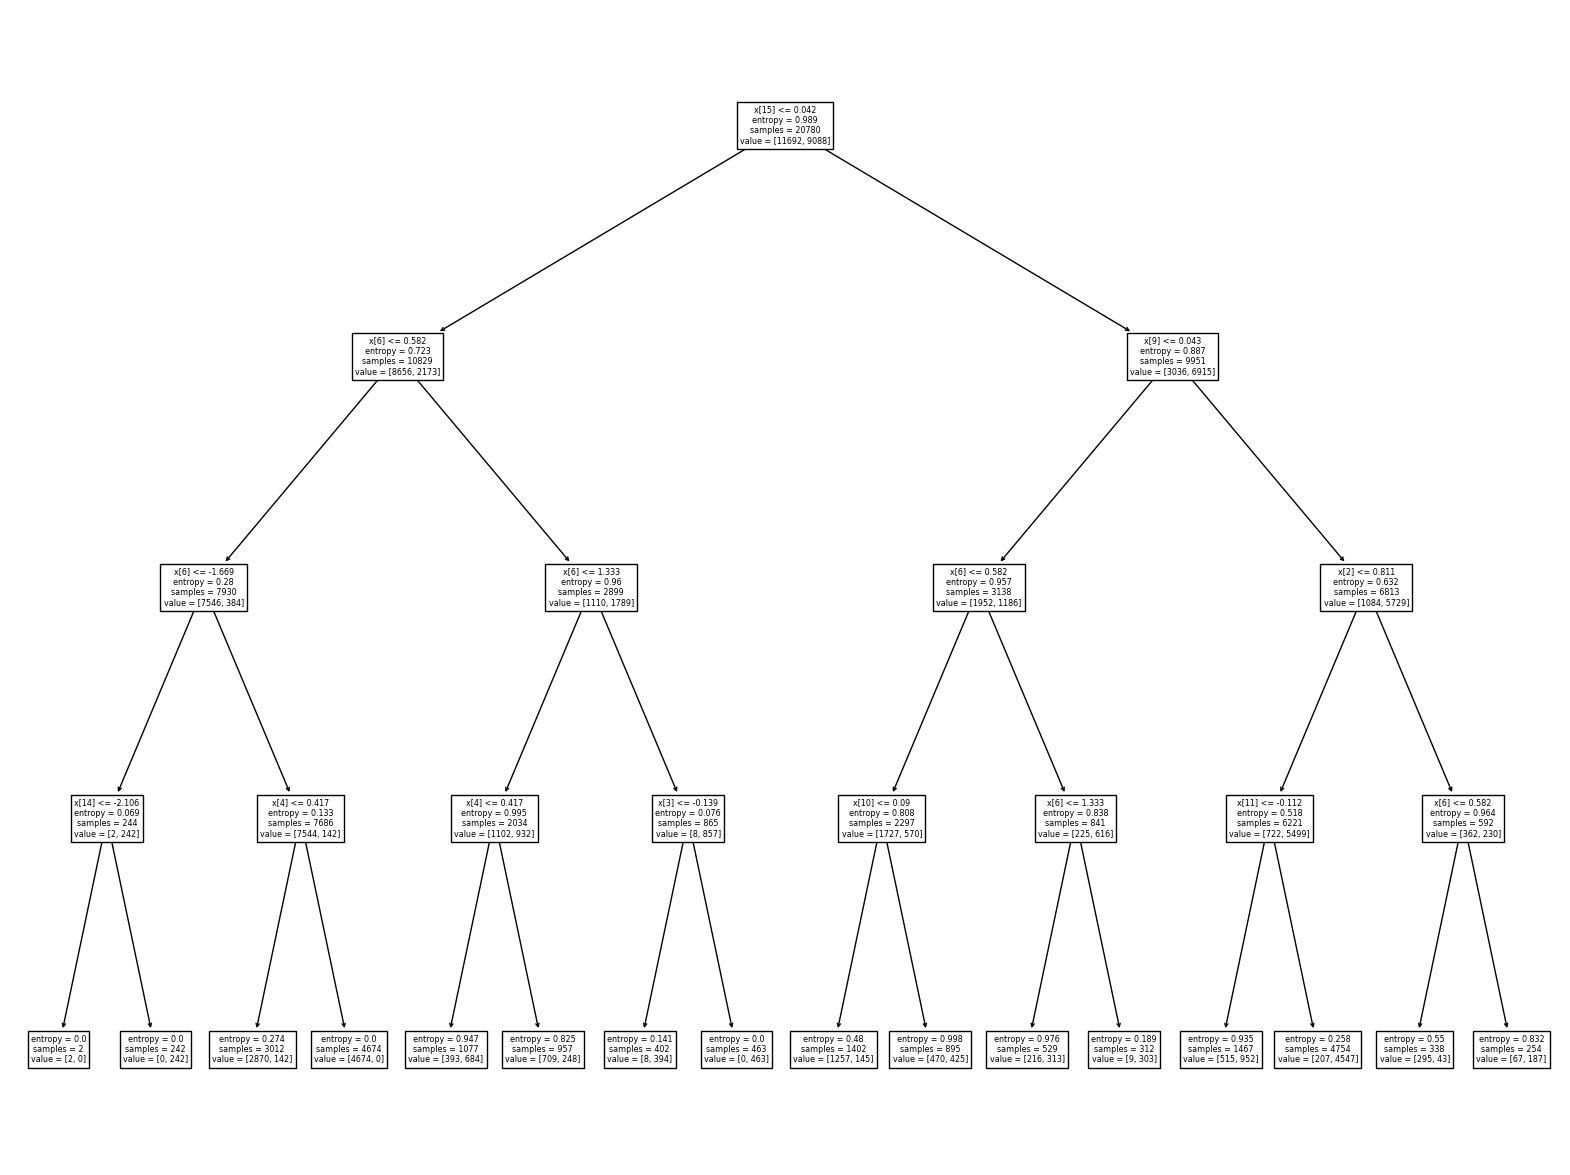

In [77]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      25976 non-null  int64  
 1   Gender                  25976 non-null  int64  
 2   Customer Type           25976 non-null  int64  
 3   Age                     25976 non-null  int64  
 4   Type of Travel          25976 non-null  int64  
 5   Flight Distance         25976 non-null  int64  
 6   Inflight wifi service   25976 non-null  int64  
 7   Ease of Online booking  25976 non-null  int64  
 8   Food and drink          25976 non-null  int64  
 9   Seat comfort            25976 non-null  int64  
 10  On-board service        25976 non-null  int64  
 11  Baggage handling        25976 non-null  int64  
 12  Checkin service         25976 non-null  int64  
 13  Inflight service        25976 non-null  int64  
 14  Cleanliness             25976 non-null

[Text(0.5, 0.9, 'satisfaction <= 0.042\nentropy = 0.989\nsamples = 20780\nvalue = [11692, 9088]\nclass = 1'),
 Text(0.25, 0.7, 'Inflight wifi service <= 0.582\nentropy = 0.723\nsamples = 10829\nvalue = [8656, 2173]\nclass = 1'),
 Text(0.125, 0.5, 'Inflight wifi service <= -1.669\nentropy = 0.28\nsamples = 7930\nvalue = [7546, 384]\nclass = 1'),
 Text(0.0625, 0.3, 'Cleanliness <= -2.106\nentropy = 0.069\nsamples = 244\nvalue = [2, 242]\nclass = 0'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 1'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 242\nvalue = [0, 242]\nclass = 0'),
 Text(0.1875, 0.3, ' Type of Travel <= 0.417\nentropy = 0.133\nsamples = 7686\nvalue = [7544, 142]\nclass = 1'),
 Text(0.15625, 0.1, 'entropy = 0.274\nsamples = 3012\nvalue = [2870, 142]\nclass = 1'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 4674\nvalue = [4674, 0]\nclass = 1'),
 Text(0.375, 0.5, 'Inflight wifi service <= 1.333\nentropy = 0.96\nsamples = 2899\nvalue = [1110, 1789

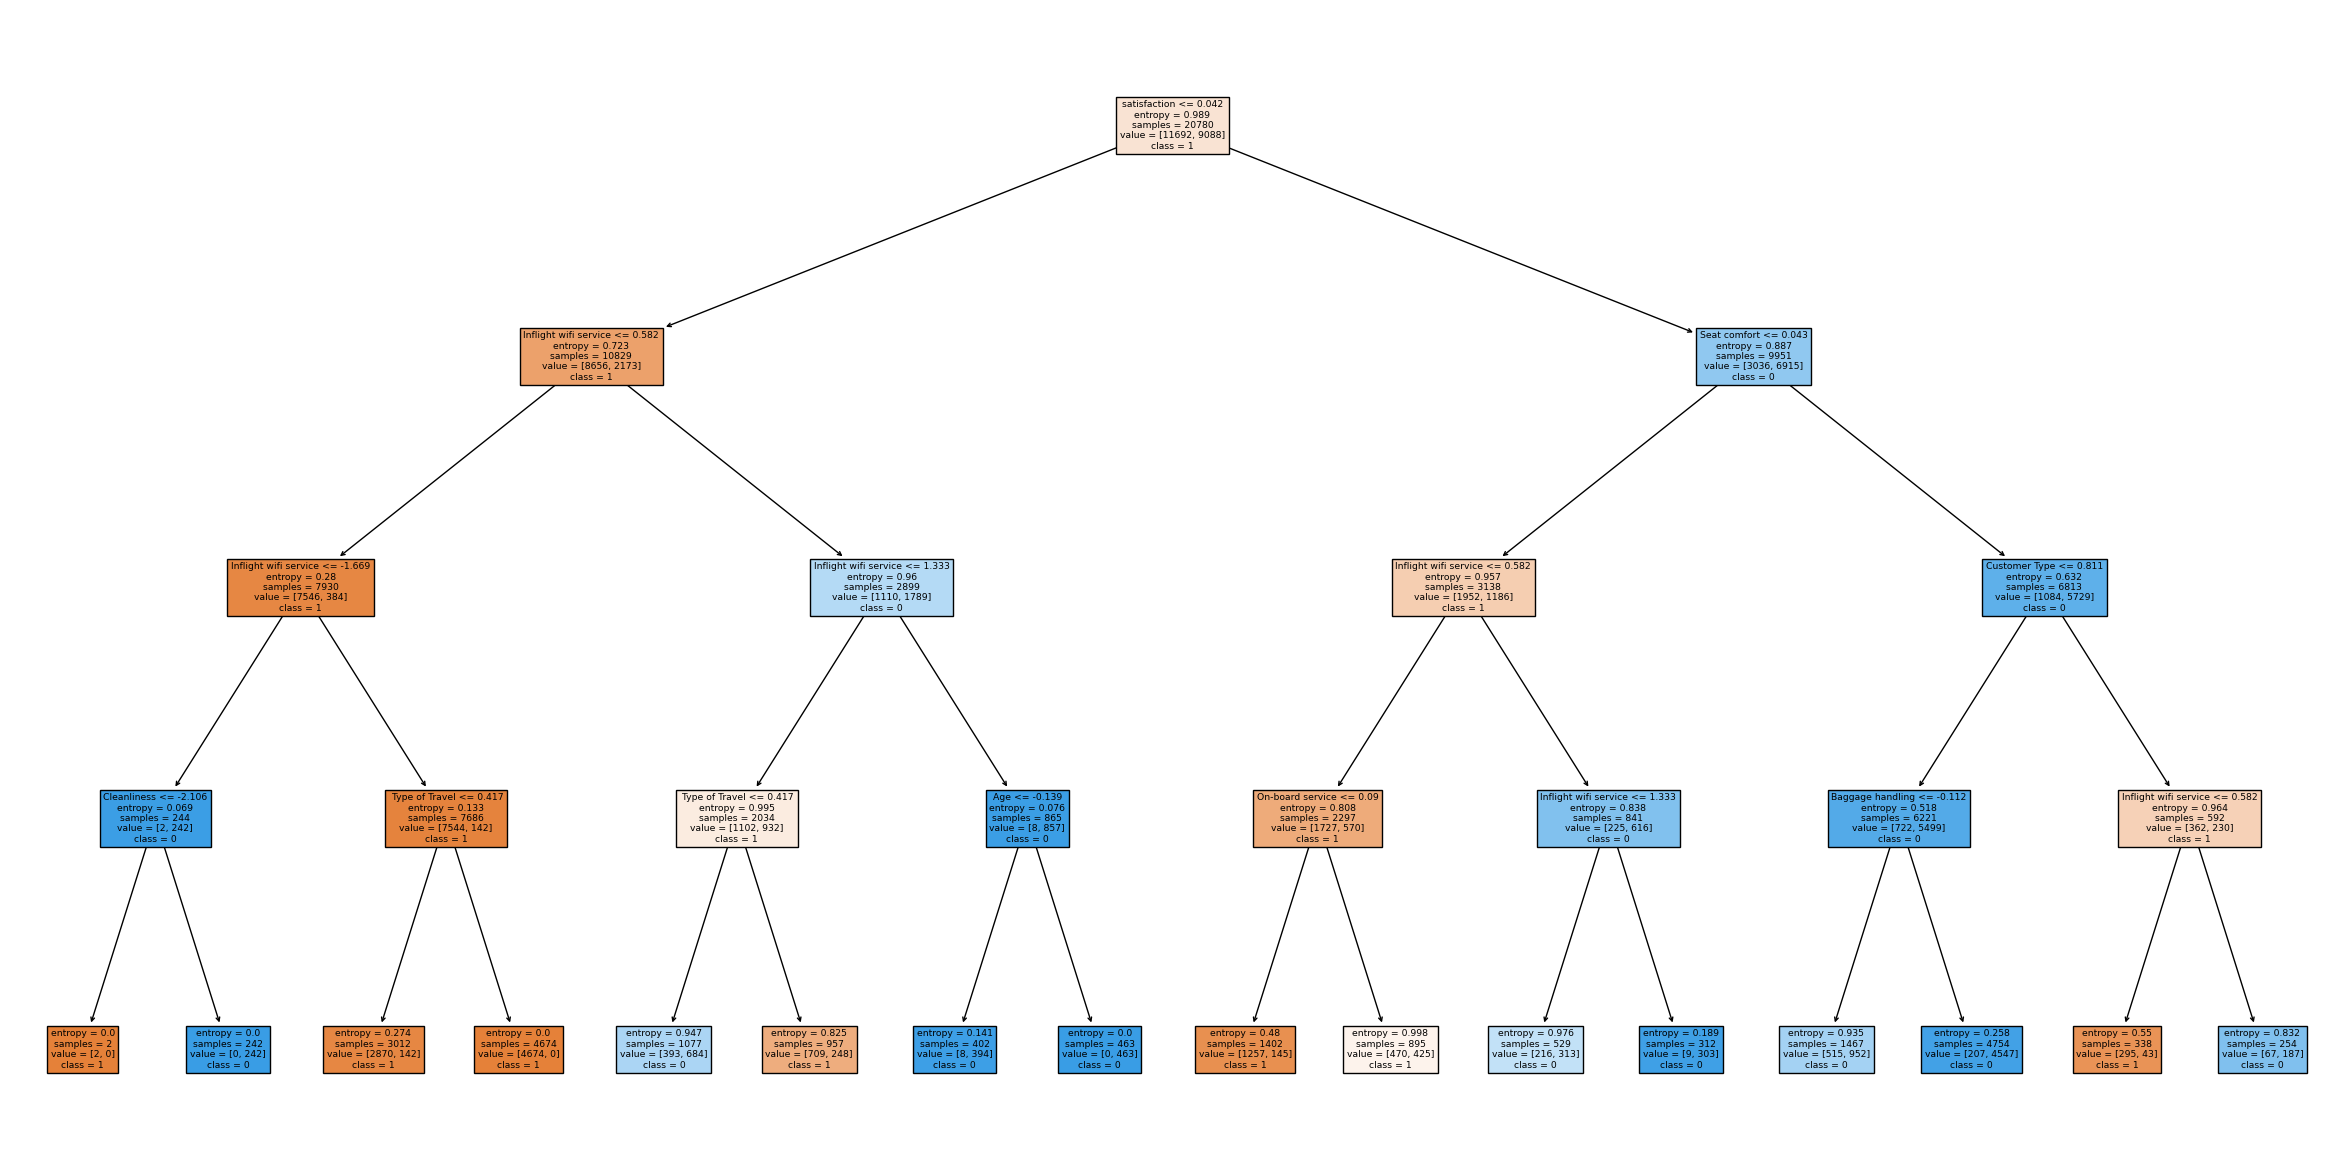

In [79]:
plt.figure(figsize=(30,15))
tree.plot_tree(dt,feature_names=['id','Gender','Customer Type','Age',' Type of Travel','Flight Distance','Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','On-board service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction','Business','Eco','Eco Plus'],class_names=['1','0'],filled=True)

building decision tree model with the balanced data

In [80]:
from sklearn.tree import DecisionTreeClassifier

dt1=DecisionTreeClassifier(max_depth=4,criterion='entropy')

dt1.fit(xres,yres)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
pre1=dt1.predict(xtest)
pre1

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [83]:
#training score

training_score=dt1.score(xres,yres)
training_score

0.8897109134450907

In [84]:
#testing score

testing_score=dt1.score(xtest,ytest)
testing_score

0.7757890685142417

In [85]:
#accuracy score

metrics.accuracy_score(ytest,pre1)

0.7757890685142417

In [86]:
#confusion matrix

metrics.confusion_matrix(ytest,pre1)

array([[1843, 1038],
       [ 127, 2188]])

In [87]:
#precision score

metrics.precision_score(ytest,pre1)

0.6782393056416615

In [88]:
#recall score

metrics.recall_score(ytest,pre1)

0.9451403887688985

In [89]:
#classification report

print(metrics.classification_report(ytest,pre1))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      2881
           1       0.68      0.95      0.79      2315

    accuracy                           0.78      5196
   macro avg       0.81      0.79      0.77      5196
weighted avg       0.82      0.78      0.77      5196



plotting decision tree model using this balanced data

[Text(0.5, 0.9, 'satisfaction <= -0.022\nentropy = 1.0\nsamples = 23384\nvalue = [11692, 11692]\nclass = 1'),
 Text(0.25, 0.7, 'Inflight wifi service <= 0.175\nentropy = 0.8\nsamples = 11437\nvalue = [8656, 2781]\nclass = 1'),
 Text(0.125, 0.5, 'Inflight wifi service <= -1.659\nentropy = 0.333\nsamples = 8039\nvalue = [7546, 493]\nclass = 1'),
 Text(0.0625, 0.3, 'Ease of Online booking <= 0.149\nentropy = 0.056\nsamples = 313\nvalue = [2, 311]\nclass = 0'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 311\nvalue = [0, 311]\nclass = 0'),
 Text(0.09375, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 1'),
 Text(0.1875, 0.3, ' Type of Travel <= 0.486\nentropy = 0.161\nsamples = 7726\nvalue = [7544, 182]\nclass = 1'),
 Text(0.15625, 0.1, 'entropy = 0.326\nsamples = 3052\nvalue = [2870, 182]\nclass = 1'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 4674\nvalue = [4674, 0]\nclass = 1'),
 Text(0.375, 0.5, 'Inflight wifi service <= 0.903\nentropy = 0.911\nsamples = 3398\nvalue = [

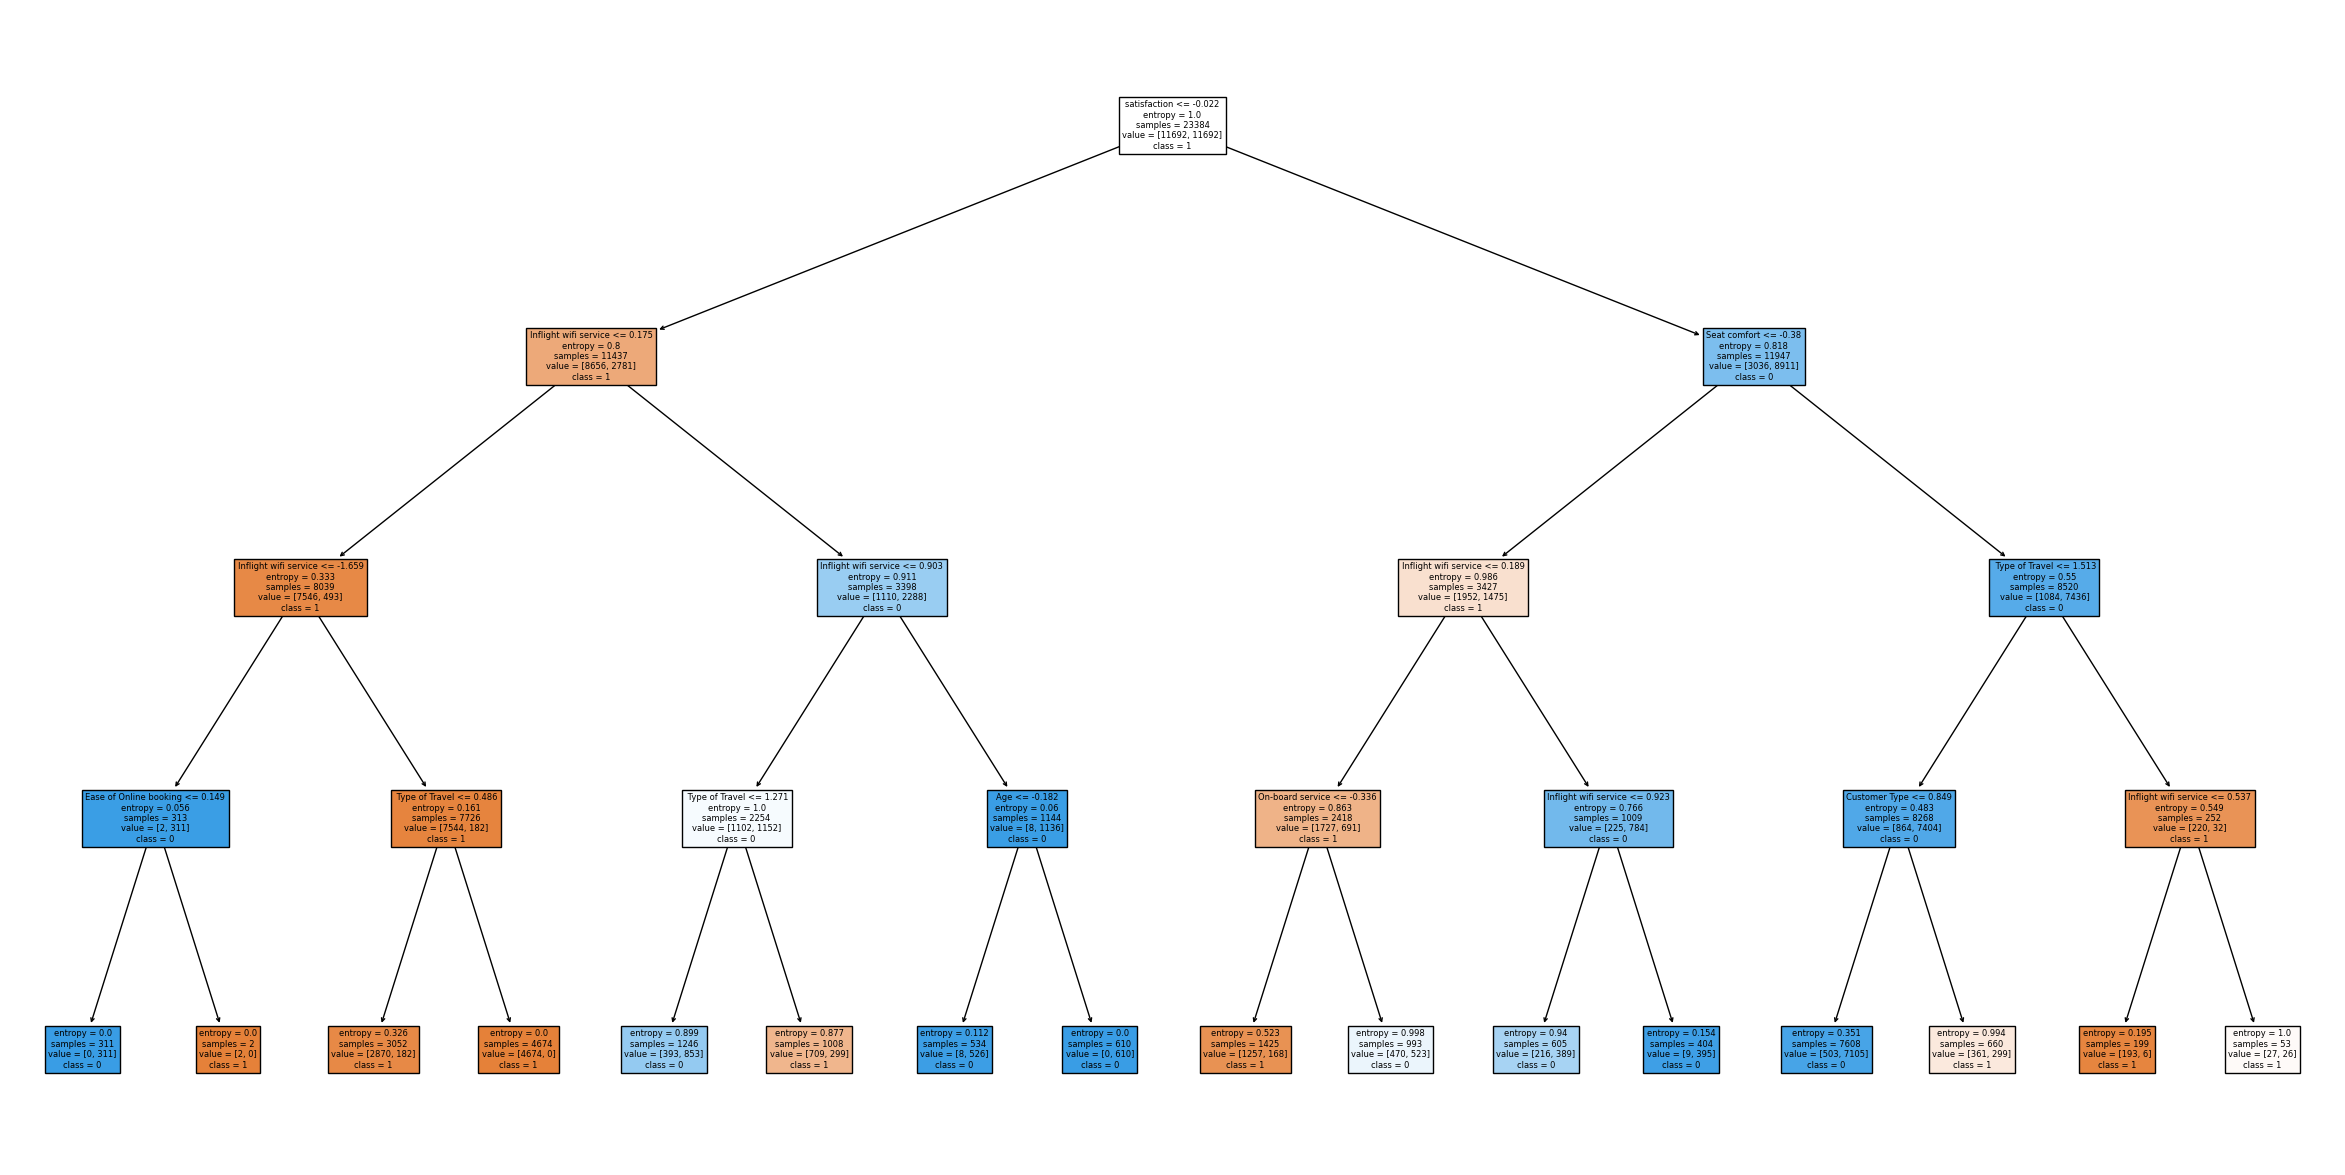

In [90]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
tree.plot_tree(dt1,feature_names=['id','Gender','Customer Type','Age',' Type of Travel','Flight Distance','Inflight wifi service','Ease of Online booking','Food and drink','Seat comfort','On-board service','Baggage handling','Checkin service','Inflight service','Cleanliness','satisfaction','Business','Eco','Eco Plus'],class_names=['1','0'],filled=True)

Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.88)

#3)Naive bayes

GaussianNB

In [92]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()

nb.fit(xtrain,ytrain)

GaussianNB()

In [95]:
ypred1=nb.predict(xtest)

In [96]:
ypred1

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [97]:
#training score

training_score = nb.score(xtrain,ytrain)
training_score

0.8216073147256978

In [ ]:
#testing score

testing_score = nb.score(xtest,ytest)
testing_score

In [98]:
#accuracy score

metrics.accuracy_score(ytest,ypred1)

0.8221709006928406

In [99]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred1)

array([[2432,  449],
       [ 475, 1840]])

In [100]:
#classification report

print(metrics.classification_report(ytest,ypred1))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2881
           1       0.80      0.79      0.80      2315

    accuracy                           0.82      5196
   macro avg       0.82      0.82      0.82      5196
weighted avg       0.82      0.82      0.82      5196



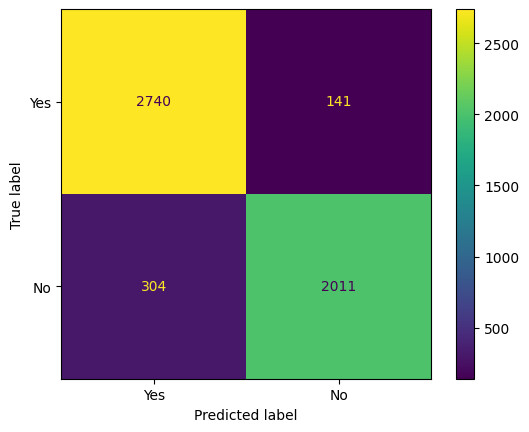

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['Yes','No']
cm=confusion_matrix(ytest,ypred)
cmd=ConfusionMatrixDisplay(cm,display_labels=labels)
cmd.plot()

building GaussianNB model with the balanced data

In [102]:
from sklearn.naive_bayes import GaussianNB

nb1=GaussianNB()

nb1.fit(xres,yres)

GaussianNB()

In [103]:
ypred11=nb1.predict(xtest)
ypred11

array([1, 1, 1, ..., 1, 0, 1])

evaluation

In [104]:
#training score

training_score = nb1.score(xres,yres)
training_score

0.8187222032158741

In [105]:
#testing score

testing_score = nb1.score(xtest,ytest)
testing_score

0.8196689761354888

In [106]:
#accuracy score

metrics.accuracy_score(ytest,ypred11)

0.8196689761354888

In [107]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred11)

array([[2360,  521],
       [ 416, 1899]])

In [108]:
#classification report

print(metrics.classification_report(ytest,ypred11))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2881
           1       0.78      0.82      0.80      2315

    accuracy                           0.82      5196
   macro avg       0.82      0.82      0.82      5196
weighted avg       0.82      0.82      0.82      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.82)

BernoulliNB

In [109]:
from sklearn.naive_bayes import BernoulliNB

br=BernoulliNB()

br.fit(xtrain,ytrain)

BernoulliNB()

In [110]:
ypred2=br.predict(xtest)
ypred2

array([1, 1, 1, ..., 1, 0, 1])

evaluation

In [111]:
#training score

training_score = br.score(xtrain,ytrain)
training_score

0.8187680461982676

In [112]:
#testing score

testing_score = br.score(xtest,ytest)
testing_score

0.8112009237875288

In [113]:
#accuracy score

metrics.accuracy_score(ytest,ypred2)

0.8112009237875288

In [114]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred2)

array([[2457,  424],
       [ 557, 1758]])

In [115]:
#classification report

print(metrics.classification_report(ytest,ypred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2881
           1       0.81      0.76      0.78      2315

    accuracy                           0.81      5196
   macro avg       0.81      0.81      0.81      5196
weighted avg       0.81      0.81      0.81      5196



building BernoulliNB model with the balanced data

In [116]:
from sklearn.naive_bayes import BernoulliNB

br1=BernoulliNB()

br1.fit(xres,yres)

BernoulliNB()

In [117]:
ypred22=br1.predict(xtest)
ypred22

array([1, 1, 1, ..., 1, 0, 1])

evaluation

In [118]:
#training score

training_score = br1.score(xres,yres)
training_score

0.8113239822100582

In [119]:
#testing score

testing_score = br1.score(xtest,ytest)
testing_score

0.8075442648190916

In [120]:
#accuracy score

metrics.accuracy_score(ytest,ypred22)

0.8075442648190916

In [121]:
#confusion matrix

metrics.confusion_matrix(ytest,ypred22)

array([[2395,  486],
       [ 514, 1801]])

In [122]:
#classification report

print(metrics.classification_report(ytest,ypred22))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2881
           1       0.79      0.78      0.78      2315

    accuracy                           0.81      5196
   macro avg       0.81      0.80      0.80      5196
weighted avg       0.81      0.81      0.81      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.81)

#4)SVM(linear)

In [258]:
from sklearn.svm import SVC

lin=SVC(kernel='linear')

lin.fit(xtrain,ytrain)

SVC(kernel='linear')

In [259]:
y1=lin.predict(xtest)

In [260]:
y1

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [261]:
#training score

training_score=lin.score(xtrain,ytrain)
training_score

0.8570741097208855

In [262]:
#testing score

testing_score=lin.score(xtest,ytest)
testing_score

0.855080831408776

In [263]:
#accuracy score

metrics.accuracy_score(ytest,y1)

0.855080831408776

In [264]:
#confusion matrix

metrics.confusion_matrix(ytest,y1)

array([[2573,  308],
       [ 445, 1870]])

In [265]:
#classification report

print(metrics.classification_report(ytest,y1))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2881
           1       0.86      0.81      0.83      2315

    accuracy                           0.86      5196
   macro avg       0.86      0.85      0.85      5196
weighted avg       0.86      0.86      0.85      5196



building SVM model with kernel function 'linear' by using the balanced data

In [131]:
from sklearn.svm import SVC

svc1=SVC(kernel='linear')

svc1.fit(xres,yres)

SVC(kernel='linear')

In [132]:
y11=svc1.predict(xtest)

In [133]:
y11

array([1, 1, 0, ..., 0, 0, 1])

In [134]:
#training score

training_score=svc1.score(xres,yres)
training_score

0.8493841943209032

In [135]:
#testing score

testing_score=svc1.score(xtest,ytest)
testing_score

0.8462278675904542

In [136]:
#accuracy score

metrics.accuracy_score(ytest,y11)

0.8462278675904542

In [137]:
#confusion matrix

metrics.confusion_matrix(ytest,y11)

array([[2430,  451],
       [ 348, 1967]])

In [138]:
#classification report

print(metrics.classification_report(ytest,y11))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      2881
           1       0.81      0.85      0.83      2315

    accuracy                           0.85      5196
   macro avg       0.84      0.85      0.84      5196
weighted avg       0.85      0.85      0.85      5196



#SVM(poly)

In [139]:
from sklearn.svm import SVC

pol=SVC(kernel='poly')

pol.fit(xtrain,ytrain)

SVC(kernel='poly')

In [140]:
y2=pol.predict(xtest)

In [141]:
y2

array([1, 0, 0, ..., 0, 0, 1])

evaluation

In [142]:
#training score

training_score=pol.score(xtrain,ytrain)
training_score

0.9243022136669875

In [143]:
#testing score

testing_score=pol.score(xtest,ytest)
testing_score

0.913972286374134

In [144]:
#accuracy score

metrics.accuracy_score(ytest,y2)

0.913972286374134

In [145]:
#confusion matrix

metrics.confusion_matrix(ytest,y2)

array([[2731,  150],
       [ 297, 2018]])

In [146]:
#classification report

print(metrics.classification_report(ytest,y2))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2881
           1       0.93      0.87      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.92      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



building SVM model with kernel function 'polynomial' by using the balanced data

In [147]:
from sklearn.svm import SVC

pol1=SVC(kernel='poly')

pol1.fit(xres,yres)

SVC(kernel='poly')

In [148]:
y22=pol1.predict(xtest)

In [149]:
y22

array([1, 0, 0, ..., 0, 0, 1])

evaluation

In [150]:
#training score

training_score=pol1.score(xres,yres)
training_score

0.9258039685254875

In [151]:
#testing score

testing_score=pol1.score(xtest,ytest)
testing_score

0.9087759815242494

In [152]:
#accuracy score

metrics.accuracy_score(ytest,y22)

0.9087759815242494

In [153]:
#confusion matrix

metrics.confusion_matrix(ytest,y22)

array([[2624,  257],
       [ 217, 2098]])

In [154]:
#classification report

print(metrics.classification_report(ytest,y22))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2881
           1       0.89      0.91      0.90      2315

    accuracy                           0.91      5196
   macro avg       0.91      0.91      0.91      5196
weighted avg       0.91      0.91      0.91      5196



#SVM(sigmoid)

In [155]:
from sklearn.svm import SVC

sig=SVC(kernel='sigmoid')

sig.fit(xtrain,ytrain)

SVC(kernel='sigmoid')

In [156]:
y3=sig.predict(xtest)

In [157]:
y3

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [158]:
#training score

training_score=sig.score(xtrain,ytrain)
training_score

0.7615976900866217

In [159]:
#testing score

testing_score=sig.score(xtest,ytest)
testing_score

0.7594303310238645

In [160]:
#accuracy score

metrics.accuracy_score(ytest,y3)

0.7594303310238645

In [161]:
#confusion matrix

metrics.confusion_matrix(ytest,y3)

array([[2268,  613],
       [ 637, 1678]])

In [162]:
#classification report

print(metrics.classification_report(ytest,y3))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2881
           1       0.73      0.72      0.73      2315

    accuracy                           0.76      5196
   macro avg       0.76      0.76      0.76      5196
weighted avg       0.76      0.76      0.76      5196



building SVM model with kernel function 'sigmoid' by using the balanced data

In [163]:
from sklearn.svm import SVC

sig1=SVC(kernel='sigmoid')

sig1.fit(xres,yres)

SVC(kernel='sigmoid')

In [164]:
y33=sig.predict(xtest)
y33

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [165]:
#training score

training_score=sig1.score(xres,yres)
training_score

0.7482466643859049

In [166]:
#testing score

testing_score=sig1.score(xtest,ytest)
testing_score

0.7486528098537336

In [167]:
#accuracy score

metrics.accuracy_score(ytest,y33)

0.7594303310238645

In [168]:
#confusion matrix

metrics.confusion_matrix(ytest,y33)

array([[2268,  613],
       [ 637, 1678]])

In [169]:
#classification report

print(metrics.classification_report(ytest,y33))

              precision    recall  f1-score   support

           0       0.78      0.79      0.78      2881
           1       0.73      0.72      0.73      2315

    accuracy                           0.76      5196
   macro avg       0.76      0.76      0.76      5196
weighted avg       0.76      0.76      0.76      5196



#SVM(radial basis function-rbf)

In [170]:
from sklearn.svm import SVC

rbf=SVC(kernel='rbf')

rbf.fit(xtrain,ytrain)

SVC()

In [171]:
y4=rbf.predict(xtest)

In [172]:
y4

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [173]:
#training score

training_score=rbf.score(xtrain,ytrain)
training_score

0.9505293551491819

In [174]:
#testing score

testing_score=rbf.score(xtest,ytest)
testing_score

0.9466897613548884

In [175]:
#accuracy score

metrics.accuracy_score(ytest,y4)

0.9466897613548884

In [176]:
#confusion matrix

metrics.confusion_matrix(ytest,y4)

array([[2777,  104],
       [ 173, 2142]])

In [177]:
#mean_squared_error

metrics.mean_squared_error(ytest,y4)

0.05331023864511163

In [178]:
#classification report

print(metrics.classification_report(ytest,y4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2881
           1       0.95      0.93      0.94      2315

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.95      5196
weighted avg       0.95      0.95      0.95      5196



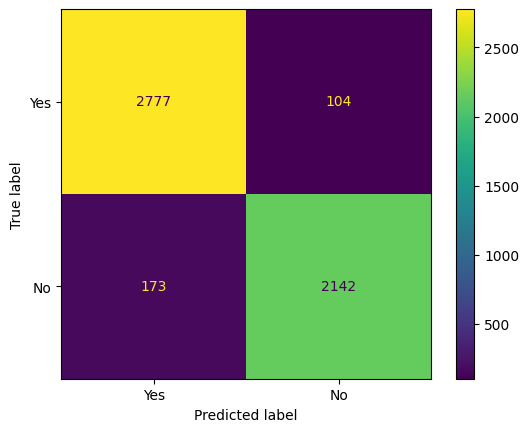

In [179]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

labels=['Yes','No']
cf=confusion_matrix(ytest,y4)
cmd=ConfusionMatrixDisplay(cf,display_labels=labels)
cmd.plot()

building SVM model with kernel function 'rbf' by using the balanced data

In [180]:
from sklearn.svm import SVC

rbf1=SVC(kernel='rbf')

rbf1.fit(xres,yres)

SVC()

In [181]:
y44=rbf.predict(xtest)
y44

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [182]:
#training score

training_score=rbf1.score(xres,yres)
training_score

0.9506072528224427

In [183]:
#testing score

testing_score=rbf1.score(xtest,ytest)
testing_score

0.9443802925327175

In [184]:
#accuracy score

metrics.accuracy_score(ytest,y44)

0.9466897613548884

In [185]:
#confusion matrix

metrics.confusion_matrix(ytest,y44)

array([[2777,  104],
       [ 173, 2142]])

In [186]:
#classification report

print(metrics.classification_report(ytest,y44))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2881
           1       0.95      0.93      0.94      2315

    accuracy                           0.95      5196
   macro avg       0.95      0.94      0.95      5196
weighted avg       0.95      0.95      0.95      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.95)

#5)logistic regression

In [187]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

lg.fit(xtrain,ytrain)

LogisticRegression()

In [188]:
yp=lg.predict(xtest)
yp

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [189]:
#training score

training_score=lg.score(xtrain,ytrain)
training_score

0.8553416746871992

In [190]:
#testing score

testing_score=lg.score(xtest,ytest)
testing_score

0.8520015396458814

In [191]:
#accuracy score

metrics.accuracy_score(ytest,yp)

0.8520015396458814

In [192]:
#confusion matrix

metrics.confusion_matrix(ytest,yp)

array([[2546,  335],
       [ 434, 1881]])

In [193]:
#classification report

print(metrics.classification_report(ytest,yp))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2881
           1       0.85      0.81      0.83      2315

    accuracy                           0.85      5196
   macro avg       0.85      0.85      0.85      5196
weighted avg       0.85      0.85      0.85      5196



In [194]:
#mean_squared_error

metrics.mean_squared_error(ytest,yp)

0.14799846035411857

building logistic regression with the implementation of balanced data

In [195]:
from sklearn.linear_model import LogisticRegression

lg1=LogisticRegression()

lg1.fit(xres,yres)

LogisticRegression()

In [196]:
yp1=lg1.predict(xtest)
yp1

array([1, 1, 1, ..., 0, 0, 1])

evaluation

In [197]:
#training score

training_score=lg1.score(xres,yres)
training_score

0.8491703729045501

In [198]:
#testing score

testing_score=lg1.score(xtest,ytest)
testing_score

0.842571208622017

In [199]:
#accuracy score

metrics.accuracy_score(ytest,yp1)

0.842571208622017

In [200]:
#confusion matrix

metrics.confusion_matrix(ytest,yp1)

array([[2394,  487],
       [ 331, 1984]])

In [201]:
#classification report

print(metrics.classification_report(ytest,yp1))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      2881
           1       0.80      0.86      0.83      2315

    accuracy                           0.84      5196
   macro avg       0.84      0.84      0.84      5196
weighted avg       0.84      0.84      0.84      5196



In [202]:
#mean_squared_error

metrics.mean_squared_error(ytest,yp1)

0.15742879137798307

Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.85)

#6)ensemble bagging

In [203]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)

rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)

In [204]:
ypr=rfc.predict(xtest)
ypr

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [205]:
#training score

training_score=rfc.score(xtrain,ytrain)
training_score

0.9038498556304139

In [206]:
#testing score

testing_score=rfc.score(xtest,ytest)
testing_score

0.8926096997690531

In [207]:
#accuracy score

metrics.accuracy_score(ytest,ypr)

0.8926096997690531

In [208]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,ypr)
confusion_matrix

array([[2572,  309],
       [ 249, 2066]])

In [209]:
#classification report

print(metrics.classification_report(ytest,ypr))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2881
           1       0.87      0.89      0.88      2315

    accuracy                           0.89      5196
   macro avg       0.89      0.89      0.89      5196
weighted avg       0.89      0.89      0.89      5196



building random forest model with the implementation of balanced data

In [210]:
from sklearn.ensemble import RandomForestClassifier

rfc1=RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)

rfc1.fit(xres,yres)

RandomForestClassifier(max_depth=5, max_features=5, n_estimators=20)

In [211]:
ypr1=rfc.predict(xtest)
ypr1

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [212]:
#training score

training_score=rfc1.score(xres,yres)
training_score

0.9273434827232295

In [213]:
#testing score

testing_score=rfc1.score(xtest,ytest)
testing_score

0.8121632024634334

In [214]:
#accuracy score

metrics.accuracy_score(ytest,ypr1)

0.8926096997690531

In [215]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,ypr1)
confusion_matrix

array([[2572,  309],
       [ 249, 2066]])

In [216]:
#classification report

print(metrics.classification_report(ytest,ypr1))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2881
           1       0.87      0.89      0.88      2315

    accuracy                           0.89      5196
   macro avg       0.89      0.89      0.89      5196
weighted avg       0.89      0.89      0.89      5196



Conclusion:-

from the above two model it is clear that both balanced and unbalanced data has accuracy (accuracy score= 0.92)

#7)adaboost

In [217]:
import sklearn.ensemble as esm

adb=esm.AdaBoostClassifier(n_estimators=10)

adb.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=10)

In [218]:
pred=adb.predict(xtest)
pred

array([1, 1, 0, ..., 0, 0, 1])

evaluation

In [219]:
#training score

training_score=adb.score(xtrain,ytrain)
training_score

0.9026948989412897

In [220]:
#testing score

testing_score=adb.score(xtest,ytest)
testing_score

0.9030023094688222

In [221]:
#accuracy score

metrics.accuracy_score(ytest,pred)

0.9030023094688222

In [222]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,pred)
confusion_matrix

array([[2626,  255],
       [ 249, 2066]])

In [223]:
#classification report

print(metrics.classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2881
           1       0.89      0.89      0.89      2315

    accuracy                           0.90      5196
   macro avg       0.90      0.90      0.90      5196
weighted avg       0.90      0.90      0.90      5196



building adaboostclassifier with the implementation of smoted data


In [227]:
import sklearn.ensemble as esm

adb1=esm.AdaBoostClassifier(n_estimators=10)

adb1.fit(xres,yres)

AdaBoostClassifier(n_estimators=10)

In [228]:
pred1=adb1.predict(xtest)
pred1

array([1, 1, 1, ..., 1, 0, 1])

evaluation

In [229]:
#training score

training_score=adb1.score(xres,yres)
training_score

0.910964762230585

In [230]:
#testing score

testing_score=adb1.score(xtest,ytest)
testing_score

0.7757890685142417

In [231]:
#accuracy score

metrics.accuracy_score(ytest,pred1)

0.7757890685142417

In [232]:
#confusion matrix

confusion_matrix=metrics.confusion_matrix(ytest,pred1)
confusion_matrix

array([[1741, 1140],
       [  25, 2290]])

In [233]:
#classification report

print(metrics.classification_report(ytest,pred1))

              precision    recall  f1-score   support

           0       0.99      0.60      0.75      2881
           1       0.67      0.99      0.80      2315

    accuracy                           0.78      5196
   macro avg       0.83      0.80      0.77      5196
weighted avg       0.84      0.78      0.77      5196



Conclusion:-

from the above two model it is clear that unbalanced data has better accuracy (accuracy score= 0.90)

from all of the models above SVM(rbf) algorithm has the highest accuracy score(=0.95)

#RandomizedSearchCV

In [266]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [267]:
help(svc)

Help on SVC in module sklearn.svm._classes object:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `

In [269]:
param_dist={'C':[1.0,1,1.5],'gamma':['scale', 'auto'],'degree':[1,2,3],'class_weight':['balanced']}

*C: [1.0, 1, 1.5]*




This is the regularization parameter in some models like Support Vector Machines (SVM) and Logistic Regression. It controls the trade-off between achieving a low training error and a low testing error, which helps prevent overfitting.



*class_weight: ['balanced']*

This parameter is used to adjust weights inversely proportional to class frequencies in the input data, helping to address class imbalance



In [276]:
RBF1=SVC(kernel='linear')

In [277]:
lin1=RandomizedSearchCV(RBF1,param_distributions=param_dist,cv=10)

In [ ]:
lin1.fit(xtrain,ytrain)


RandomizedSearchCV(cv=10, estimator=SVC(kernel='linear'),
                   param_distributions={'C': [1.0, 1, 1.5],
                                        'class_weight': ['balanced'],
                                        'degree': [1, 2, 3],
                                        'gamma': ['scale', 'auto']})

In [ ]:
print(lin1.best_params_)

{'gamma': 'scale', 'degree': 3, 'class_weight': 'balanced', 'C': 1.0}


In [ ]:
print(lin1.score(xtest,ytest))

0.8496920708237106


In [ ]:
lin2=SVC(gamma= 'scale', degree= 2, class_weight= 'balanced', C= 1.5)

In [ ]:
lin2.fit(xtrain,ytrain)

SVC(C=1.5, class_weight='balanced', degree=2)

In [ ]:
y_pred=lin2.predict(xtest)

In [ ]:
#accuracy score

print(metrics.accuracy_score(ytest,y_pred))

0.9468822170900693


#GridSearchCV

In [246]:
from sklearn.model_selection import GridSearchCV

In [247]:
knn1 = KNeighborsClassifier()

In [248]:
help(knn)

Help on KNeighborsClassifier in module sklearn.neighbors._classification object:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neigh

In [249]:
params = {'n_neighbors':[5,6,2], 'weights':['uniform', 'distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}

knn2 = GridSearchCV(knn1,params,cv=10,scoring='accuracy')

knn2.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 6, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

*weights: ['uniform', 'distance']*

 This parameter determines how the influence of each neighbor is weighted when making predictions.

*algorithm: ['auto', 'ball_tree', 'kd_tree', 'brute']*

 This parameter defines the algorithm used to compute the nearest neighbors.

In [250]:
knn2.best_params_

{'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}

In [251]:
ypred3 = knn2.predict(xtest)
ypred3

array([1, 1, 0, ..., 0, 0, 1])

In [252]:
print(knn2.score(xtest,ytest))

0.9151270207852193


In [253]:
knn3=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, weights= 'distance')

In [254]:
knn3.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [255]:
ypred4 = knn3.predict(xtest)

In [256]:
#accuracy score

print(metrics.accuracy_score(ytest,ypred4))

0.9151270207852193


#streamlit GUI

using pickle function to save the best model we have built

In [ ]:
import pickle

pickle.dump(rbf,open('rbf.sav','wb'))

In [ ]:
import pickle

pickle.dump(sd,open('srbf.sav','wb'))

#Conclusion




After experimenting with multiple models and performing extensive hyperparameter tuning, the Support Vector Machine (SVM) model with the Radial Basis Function (RBF) kernel has emerged as the best-performing model. This conclusion is based on the model's superior performance metrics, such as accuracy, precision, recall, and F1 score, on both the training and validation datasets.